In [1]:
from tiny_gp import TinyGP, Operation, Hist, GeneticSolver
import numpy as np
from typing import *
import matplotlib.pyplot as plt


TinyGP.set_java_path("java")  # set path to JVM

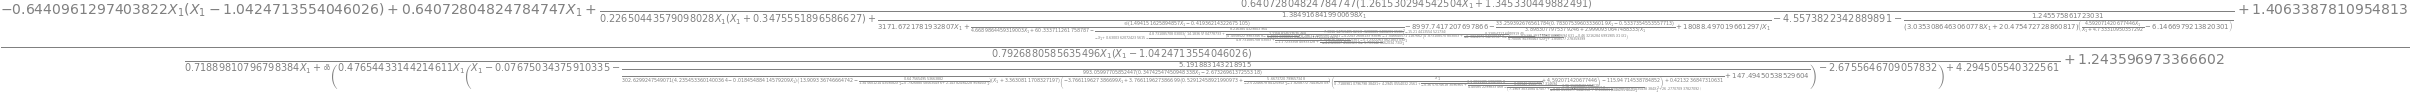

In [3]:
from sympy import *
import time
import numpy as np

x = np.linspace(0, 10, 10000)

X1 = symbols('X1')
init_printing(use_unicode=True)

# simplify("X1 + X1 * 2")

gp = TinyGP.from_json("./gps/gp_problem2_a.json")
ind = gp.hist.entries[-1].best_individual

ind.minimal_form

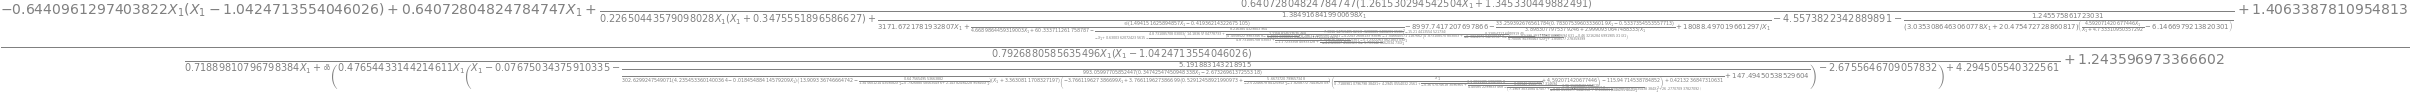

In [4]:
ind.minimal_form

In [20]:
# ex01
solver_01 = GeneticSolver('problem1_a')
hist_01 = solver_01.solve(generations=50)
solver_01.plot()

Server started
-- TINY GP (Java version) --
SEED=-1
MAX_LEN=10000
POPSIZE=100000
DEPTH=5
CROSSOVER_PROB=0.9
PMUT_PER_NODE=0.05
MIN_RANDOM=-5.0
MAX_RANDOM=5.0
GENERATIONS=100
TSIZE=2
----------------------------------
Generation=0 Avg Fitness=136317.16748705175 Best Fitness=64655.20080574633 Avg Size=11.0151
Best Individual: ((1.5778042961001146 - (((X1 / -0.09824421898698965) * 3.494440066141461) / ((-0.45904448670663367 * -1.7443654774023787) / (2.014078326385059 * -2.095290562915124)))) / (0.9807172531621973 + (((0.1733000677131571 + -2.6551100333244406) * (-3.8431370354278247 + 2.014078326385059)) / -2.6551100333244406)))
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■] 100%  0,15s
Generation=1 Avg Fitness=130717.2744357314 Best Fitness=64655.20080574633 Avg Size=11.04996
Best Individual: ((1.5778042961001146 - (((X1 / -0.09824421898698965) * 3.494440066141461) / ((-0.45904448670663367 * -1.7443654774023787) / (2.014078326385059 

KeyboardInterrupt: 

In [5]:
targets = list()

with open("./data/problem1_a.dat", "r") as f:
    line = f.readline()
    varnumber, randomnumber, minrandom, maxrandom, fitnesscases = [int(s) for s in line.split()]
    for line in f:
        targets.extend([float(s) for s in line.split()])
        
targets_np = np.array(targets)
targets_np = targets_np.reshape([fitnesscases,varnumber+1])  # 101 fitness cases and 1 variable, 1 result

In [6]:
tiny_gp = TinyGP(
    constant_count=randomnumber,
    min_random=minrandom,
    max_random=maxrandom,
    # operations={Operation.ADD, Operation.MUL}  # you can provide custom operation (at least one must be 2 argument function)
)
# FIXME to stop the evolution at will you have to restart the jupyter kernel 
# hist = tiny_gp.fit(targets_np, random_state=3)  # YES random_state!!!!
hist = tiny_gp.fit(targets_np)

Server started
-- TINY GP (Java version) --
SEED=-1
MAX_LEN=10000
POPSIZE=100000
DEPTH=5
CROSSOVER_PROB=0.9
PMUT_PER_NODE=0.05
MIN_RANDOM=-10.0
MAX_RANDOM=10.0
GENERATIONS=30
TSIZE=2
----------------------------------
Generation=0 Avg Fitness=1000420.1414715392 Best Fitness=64638.826736351846 Avg Size=11.00462
Best Individual: (((7.512583018767753 - ((-5.380672396783918 * -7.394874773890427) * X1)) * -6.19661617195211) - 5.775773659013453)
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■] 100%  0.18s
Generation=1 Avg Fitness=946854.1348636176 Best Fitness=64638.826736351846 Avg Size=10.40918
Best Individual: (((7.512583018767753 - ((-5.380672396783918 * -7.394874773890427) * X1)) * -6.19661617195211) - 5.775773659013453)
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■] 100%  0.18s
Generation=2 Avg Fitness=130820.8678730624 Best Fitness=64638.826736351846 Avg Size=11.77504
Best Ind

In [13]:
x = hist.model_dump()
print(x)

import json
with open('hist_test.json', 'w') as f:
    json.dump(x, f)

{'entries': [{'gen': 0, 'avg_fitness': 1000420.1414715392, 'best_fitness': 64638.826736351846, 'avg_size': 11.00462, 'best_individual': {'individual_raw': ['o', 'p', 'o', '\x06', 'p', 'p', '+', 'V', '\x00', '\x18', '9'], 'individual': ['o', 'p', 'o', 7.512583018767753, 'p', 'p', -5.380672396783918, -7.394874773890427, '\x00', -6.19661617195211, 5.775773659013453], 'operations': {'ADD': 110, 'SUB': 111, 'MUL': 112, 'DIV': 113, 'EXP': 114, 'SIN': 115, 'COS': 116, 'FSET_END': 113, 'FSET_2ARG_END': 113}}}, {'gen': 1, 'avg_fitness': 946854.1348636176, 'best_fitness': 64638.826736351846, 'avg_size': 10.40918, 'best_individual': {'individual_raw': ['o', 'p', 'o', '\x06', 'p', 'p', '+', 'V', '\x00', '\x18', '9'], 'individual': ['o', 'p', 'o', 7.512583018767753, 'p', 'p', -5.380672396783918, -7.394874773890427, '\x00', -6.19661617195211, 5.775773659013453], 'operations': {'ADD': 110, 'SUB': 111, 'MUL': 112, 'DIV': 113, 'EXP': 114, 'SIN': 115, 'COS': 116, 'FSET_END': 113, 'FSET_2ARG_END': 113}}}

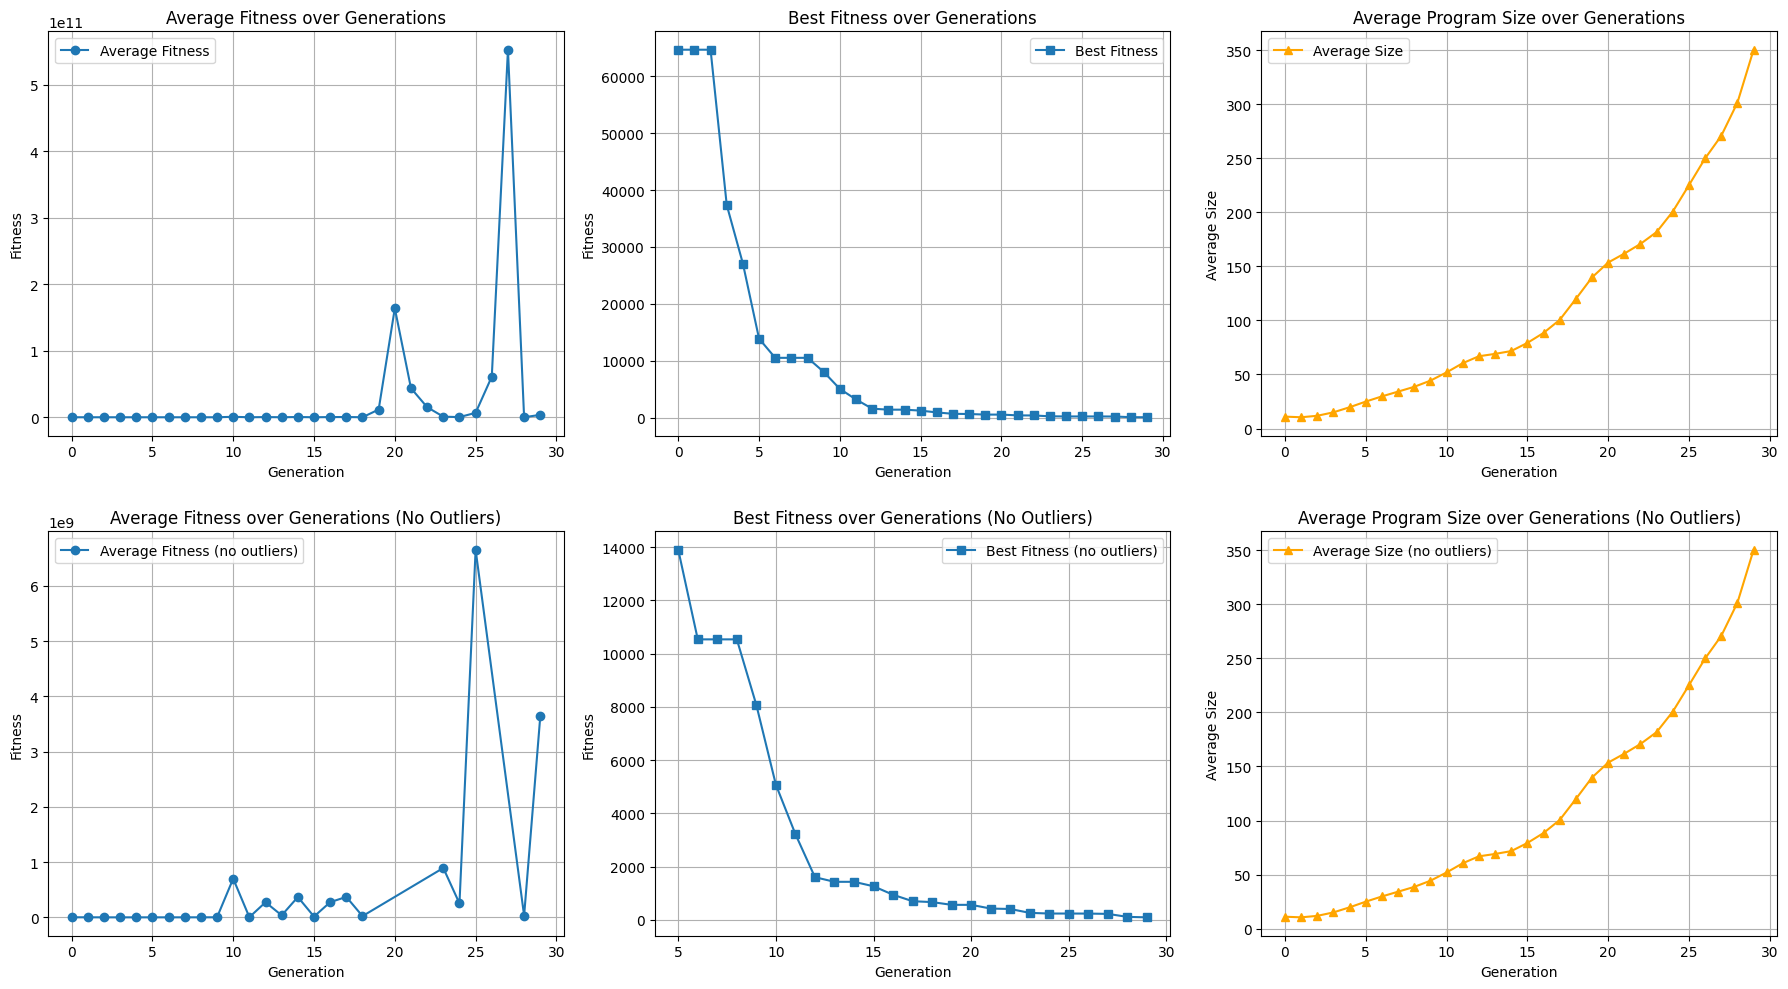

In [21]:
with open('hist_test.json','r') as f:
    hist_ret = json.load(f)


hist_ret = Hist.model_validate(hist_ret)
hist_ret.plot()

In [7]:
tiny_gp.save_json("test.json")

In [ ]:
# gp = tiny_gp.from_json("test.json")

In [6]:
print(hist.generation)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


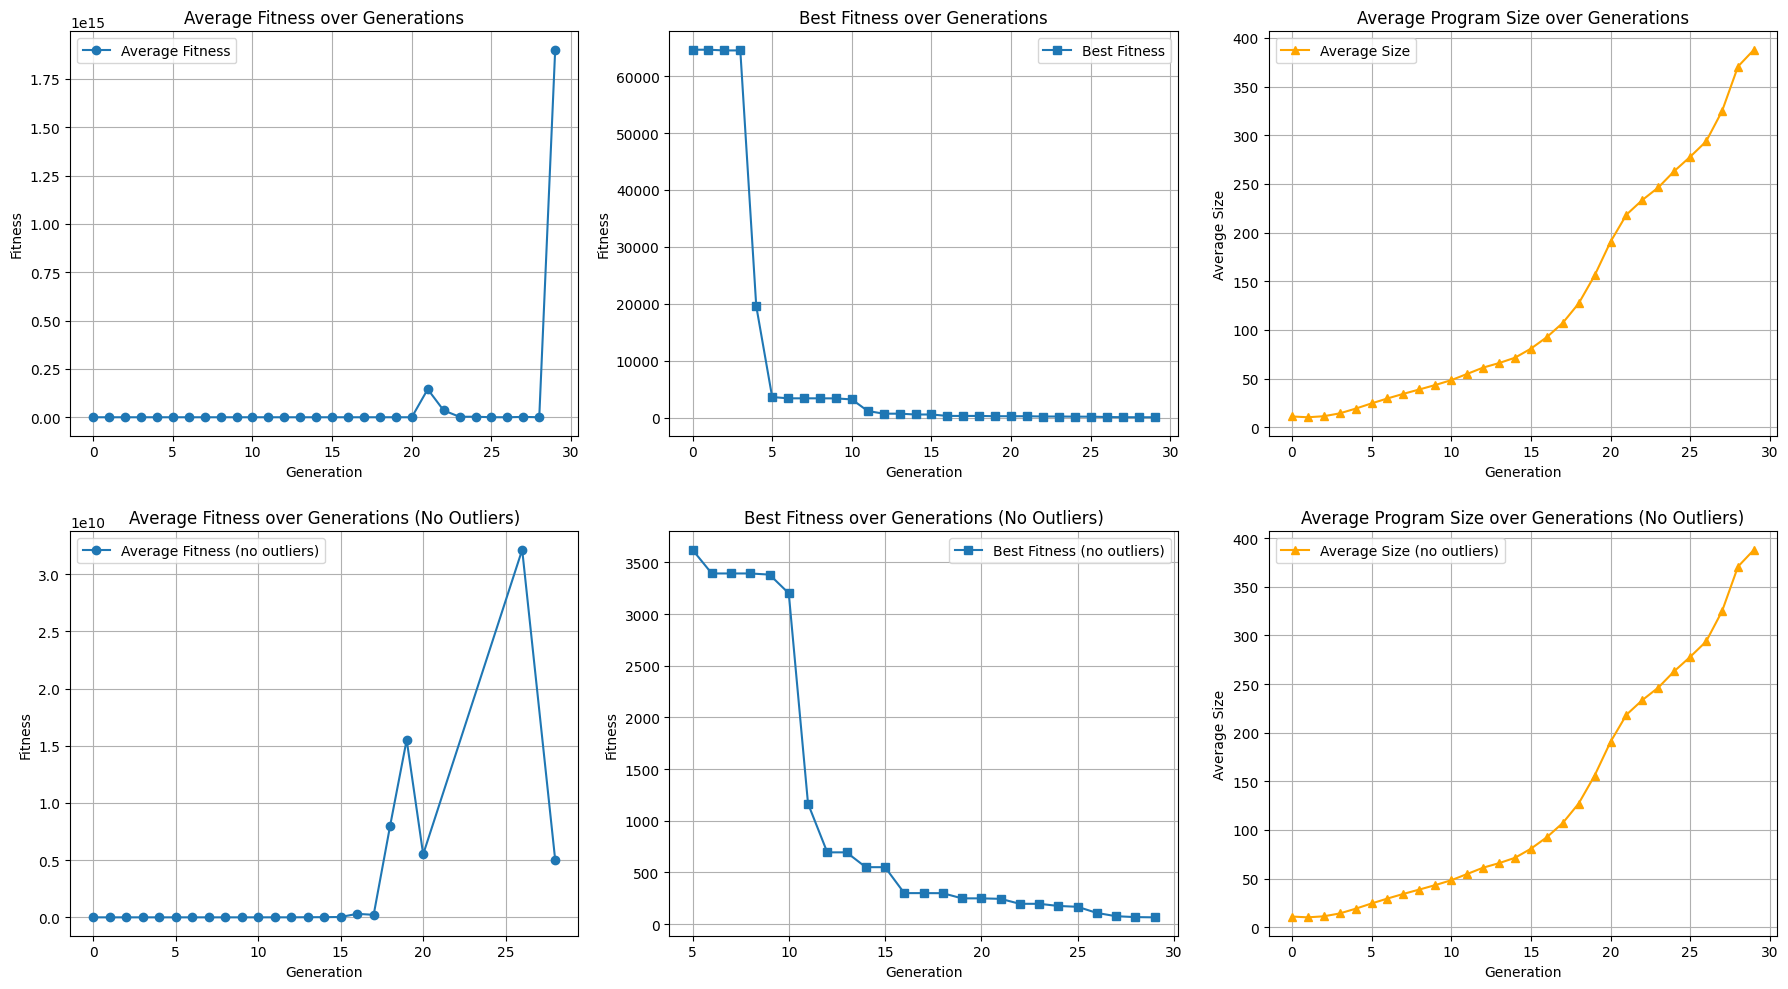

In [7]:
hist.plot()  # TODO finish this function to maybe exclude the outliers or maybe log scale?
# tiny_gp.hist.plot()  # history is also saved with the class

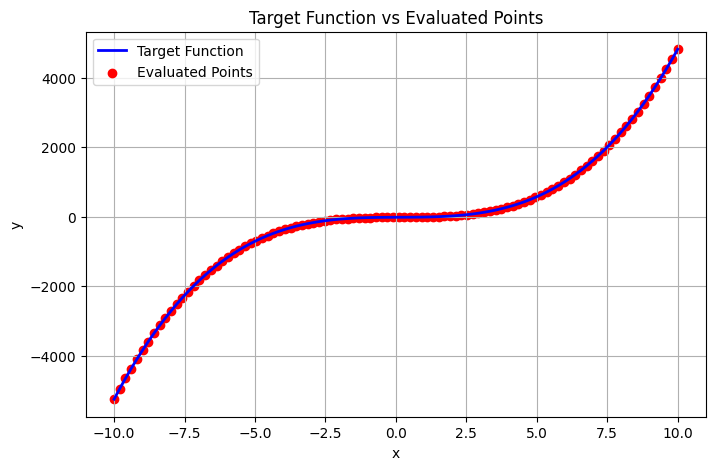

In [8]:
tiny_gp.plot()  # TODO maybe also provide error and type of fitness function?

In [9]:
def generate_data():
    def generate_data_file(file_name: str, var_num: int, formula: callable, domain_start: float, domain_end: float, num_of_points: Optional[int] = 100):
        if var_num == 1:
            points = np.linspace(domain_start, domain_end, num=num_of_points)
            y_ = formula(points)
            
            plt.plot(points, y_)

            with open(file_name, 'w') as file:
                file.write(f'{var_num} 100 {domain_start} {domain_end} {num_of_points}\n')
                for x in points:
                    y = formula(x)
                    file.write(f'{x} {y}\n')

        if var_num == 2:

            x = np.linspace(domain_start, domain_end, num=num_of_points)
            y = np.linspace(domain_start+1, domain_end+1, num=num_of_points)
            z = formula(x, y)

            fig = plt.figure()
            ax = plt.axes(projection='3d')

            ax.plot3D(x, y, z, 'green')
            ax.set_title('3D Line Plot')
            plt.show()

            with open(file_name, 'w') as file:
                file.write(f'{var_num} 100 {domain_start} {domain_end} {num_of_points}\n')
                for x_, z_ in zip(x, z):
                    file.write(f'{x_} {x_} {z_}\n')

    # 1
    generate_data_file('./data/problem1_a.dat', 1, lambda x: 5*x**3 - 2*x**2 + 3*x - 17, -10, 10, num_of_points=100)
    generate_data_file('./data/problem1_b.dat', 1, lambda x: 5*x**3 - 2*x**2 + 3*x - 17, 0, 100, num_of_points=100)
    generate_data_file('./data/problem1_c.dat', 1, lambda x: 5*x**3 - 2*x**2 + 3*x - 17, -1, 1, num_of_points=100)
    generate_data_file('./data/problem1_d.dat', 1, lambda x: 5*x**3 - 2*x**2 + 3*x - 17, -1000, 1000, num_of_points=100)

    # 2
    generate_data_file('./data/problem2_a.dat', 1, lambda x: np.sin(x) + np.cos(x), -3.14, 3.14, num_of_points=100)
    generate_data_file('./data/problem2_b.dat', 1, lambda x: np.sin(x) + np.cos(x), 0, 7, num_of_points=100)
    generate_data_file('./data/problem2_c.dat', 1, lambda x: np.sin(x) + np.cos(x), 0, 100, num_of_points=100)
    generate_data_file('./data/problem2_d.dat', 1, lambda x: np.sin(x) + np.cos(x), -100, 100, num_of_points=100)   # ciekawa!!!

    # # 3
    generate_data_file('./data/problem3_a.dat', 1, lambda x: 2* np.log(x+1), 0, 4, num_of_points=100)
    generate_data_file('./data/problem3_b.dat', 1, lambda x: 2* np.log(x+1), 0, 9, num_of_points=100)
    generate_data_file('./data/problem3_c.dat', 1, lambda x: 2* np.log(x+1), 0, 99, num_of_points=100)
    generate_data_file('./data/problem3_d.dat', 1, lambda x: 2* np.log(x+1), 0, 999, num_of_points=100)

    # 4
    generate_data_file('./data/problem4_a.dat', 2, lambda x, y: x + 2*y , 0, 1, num_of_points=10000)
    generate_data_file('./data/problem4_b.dat', 2, lambda x, y: x + 2*y , -10, 10, num_of_points=10000)
    generate_data_file('./data/problem4_c.dat', 2, lambda x, y: x + 2*y , 0, 100, num_of_points=10000)
    generate_data_file('./data/problem4_d.dat', 2, lambda x, y: x + 2*y , -1000, 1000, num_of_points=10000)

    # 5
    generate_data_file('./data/problem5_a.dat', 1, lambda x: np.sin(x/2) + 2*np.cos(x), -3.14, 3.14, num_of_points=100)
    generate_data_file('./data/problem5_b.dat', 1, lambda x: np.sin(x/2) + 2*np.cos(x), 0, 7, num_of_points=100)
    generate_data_file('./data/problem5_c.dat', 1, lambda x: np.sin(x/2) + 2*np.cos(x), 0, 100, num_of_points=100)
    generate_data_file('./data/problem5_d.dat', 1, lambda x: np.sin(x/2) + 2*np.cos(x), -100, 100, num_of_points=100)   # ciekawa!!!

    # 6
    generate_data_file('./data/problem6_a.dat', 1, lambda x, y: x**2 + 3*x*y - 7*y + 1, -10, 10, num_of_points=100)
    generate_data_file('./data/problem6_b.dat', 1, lambda x, y: x**2 + 3*x*y - 7*y + 1, 0, 100, num_of_points=100)
    generate_data_file('./data/problem6_c.dat', 1, lambda x, y: x**2 + 3*x*y - 7*y + 1, -1, 1, num_of_points=100)
    generate_data_file('./data/problem6_d.dat', 1, lambda x, y: x**2 + 3*x*y - 7*y + 1, -1000, 1000, num_of_points=100)

In [2]:
# from create_data import generate_data
# generate_data()     # podaj argument True -> dostaniesz wykresy!

In [9]:
gp = tiny_gp.from_json("test.json")

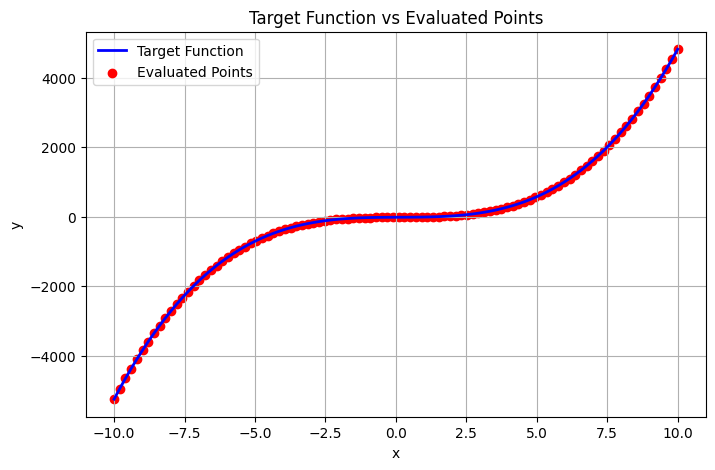

In [10]:
gp.plot()

Server started
-- TINY GP (Java version) --
SEED=-1
MAX_LEN=10000
POPSIZE=100000
DEPTH=5
CROSSOVER_PROB=0.9
PMUT_PER_NODE=0.05
MIN_RANDOM=-10.0
MAX_RANDOM=10.0
GENERATIONS=30
TSIZE=2
----------------------------------
Generation=0 Avg Fitness=237565.36798594444 Best Fitness=64667.66290293008 Avg Size=11.04836
Best Individual: ((-5.011179128612464 * (9.40727049265336 * -5.511291428025826)) * X1)
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■] 100%  0.14s
Generation=1 Avg Fitness=140542.71010969963 Best Fitness=58258.0040440071 Avg Size=10.24108
Best Individual: (((3.021874366156217 / (2.3076984564191694 + 2.118592917849112)) + ((5.1365522521925335 * (X1 + 2.727374739459732)) * -0.8684945150295817)) / (-0.15184461423949713 - (-5.376429109699032 / ((6.53471190588796 / (6.85848117562081 - 8.084868611800296)) * (-9.471837376399868 - (-1.8231793114761548 + (X1 / (9.40727049265336 + (6.117231690338279 / 1.116477280706988)))))))))
[■■■■■■■

TypeError: TinyGP.to_json() takes 1 positional argument but 2 were given

In [11]:
from scipy import special

N = 100_000

def selection_probability(k, i):
    """i - selected individual, k - tournament size"""
    return (special.comb(i, k) - special.comb(i-1, k)) / special.comb(N, k)

def useful_iteration_probability(k, D):
    """D - num of threads, k - tournament size"""
    d_works = lambda d: sum(
        selection_probability(k, i) *
        (1 - selection_probability(k, i)) ** (d - 1)
        for i in range(1, N + 1))
    useful = sum(d_works(d) for d in range(1, D + 1)) / D
    return useful

print(useful_iteration_probability(2, 4))

0.9999800000999973
